# Using Exploratory Data Analysis to make data driven recommendations for Instacart

Exploring Instacart Data to Develop Insights into Consumer Behaviors
In this project I will be evaluating data from Instacart. This will require cleaning up the data itself and then exploring the trends of shoppers. I will look into what consumers are purchasing, when they do their shopping, and how many of return to using Instacart services. This effort will help with developing business strategies to grow as a company.

In [1]:
# Import packages for completing the EDA
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [ ]:
#For each of the data files I will take a look at how they're structured, then add parameters to format them to usable dataframes.
#I will also call the info function on them to see the data types and number of rows, as well as get clues about missing values.
df_orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
display(df_orders.head())
print()
df_orders.info()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [ ]:
df_products = pd.read_csv('/datasets/products.csv', sep=';')
display(df_products.head())
print()
df_products.info()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [ ]:
df_aisles = pd.read_csv('/datasets/aisles.csv', sep=';')
display(df_aisles.head())
print()
df_aisles.info()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [ ]:
df_departments = pd.read_csv('/datasets/departments.csv', sep=';')
display(df_departments)
print()
df_departments.info()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [ ]:
df_order_products = pd.read_csv('/datasets/order_products.csv', sep=';')
display(df_order_products.head(10))
print()
df_order_products.info(show_counts=True)


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1
5,2456893,21616,4.0,1
6,644579,12341,5.0,1
7,2231852,44925,10.0,1
8,3185766,36259,14.0,1
9,420019,23315,4.0,1



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Find and remove duplicate values (and describe why you make your choices)

### `orders` data frame

In [ ]:
# Check for duplicated orders
duplicates1 = df_orders.duplicated().sum() #using the .sum() method will show me a count of all the duplicated rows
print('There are', duplicates1, 'duplicates')

There are 15 duplicates


In [ ]:
# Check for all orders placed Wednesday at 2:00 AM
#dows = {0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'}
#I made the assumption that the above values for days of week are what we see in the raw data
wednesday_orders_2am = (df_orders['order_dow'] == 3) & (df_orders['order_hour_of_day'] == 2)
print(df_orders[wednesday_orders_2am][['user_id','order_dow', 'order_hour_of_day']])
#after running this code, it appears that there are 121 orders at 2am on Wednesdays because there are 121 rows of data

        user_id  order_dow  order_hour_of_day
4838     162084          3                  2
5156     138285          3                  2
15506     58599          3                  2
18420    120200          3                  2
24691     77357          3                  2
...         ...        ...                ...
457013    14881          3                  2
458816   164782          3                  2
459635   106435          3                  2
468324    54979          3                  2
477526    46860          3                  2

[121 rows x 3 columns]


In [ ]:
# Remove duplicate orders
df_orders = df_orders.drop_duplicates()


In [ ]:
# Double check for duplicate rows
print('there are now', df_orders.duplicated().sum(), 'duplicates')

there are now 0 duplicates


In [ ]:
# Double check for duplicate order IDs only
print('there are', df_orders['order_id'].duplicated().sum(), 'duplicates in order IDs')
# this shows that all 15 of the duplicate values coincided with the duplicate order ID's

there are 0 duplicates in order IDs


### `products` data frame

In [ ]:
# Check for fully duplicate rows
print('there are', df_products.duplicated().sum(), 'fully duplicated rows')
#there are no fully duplicated rows

there are 0 fully duplicated rows


In [ ]:
# Check for just duplicate product IDs
print('there are', df_products['product_id'].duplicated().sum(), 'duplicated product IDs')

there are 0 duplicated product IDs


In [ ]:
# Check for just duplicate product names (convert names to lowercase to compare better)
df_products['product_name'].str.lower() #This converts the names all to lowercase
print('there are', df_products['product_name'].duplicated().sum(), 'duplicated product names')

there are 1257 duplicated product names


In [ ]:
# Check for duplicate product names that aren't missing
#Calling .isna() on this will show me the values that are missing
print('there are', df_products['product_name'].isna().sum(), 'duplicates that are not missing')

there are 1258 duplicates that are not missing


### `departments` data frame

In [ ]:
#Checking for duplicates
print('there are', df_departments.duplicated().sum(), 'duplicated departments')

there are 0 duplicated departments


### `aisles` data frame

In [ ]:
#Checking for duplicates
print('there are', df_aisles.duplicated().sum(), 'duplicated aisles')

there are 0 duplicated aisles


### `order_products` data frame

In [ ]:
# Check for fully duplicate rows
print('there are', df_order_products.duplicated().sum(), 'duplicated rows')

there are 0 duplicated rows


In [ ]:
# Double check for any other tricky duplicates
#This code will look to see if there are any duplicate pairs between order_id and product_id
print('there are',df_order_products.duplicated(subset=['order_id','product_id']).sum(),'"tricky" duplicates')


there are 0 "tricky" duplicates


## Find and remove missing values


### `products` data frame

In [ ]:
#I'm just bringing the dataframe into view so I don't have to keep scrolling to the top to reference it.
print(df_products.head()) 

   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  


In [ ]:
# Are all of the missing product names associated with aisle ID 100?
missing_product_names = df_products['product_name'].isna().sum() #this defines what a missing product is
print('There are',missing_product_names, 'missing values in product_name.')
print()
aisle_100 = df_products['aisle_id']==100 #this will define aisle 100 specifically
print(df_products[aisle_100].isna().sum())
print('All of the missing values in this data frame are in aisle_id 100')

There are 1258 missing values in product_name.

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64
All of the missing values in this data frame are in aisle_id 100


In [ ]:
# Are all of the missing product names associated with department ID 21?
dept_21 = df_products['department_id']==21 #This will isolate just department 21
print(df_products[dept_21].isna().sum())

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64


In [ ]:
# What is this ailse and department?
#I will use query twice to show what is in each of the departments and aisles in question
department_21 = df_departments.query('department_id == 21')[['department_id', 'department']]
print(department_21)
print()
asl_100 = df_aisles.query('aisle_id == 100')[['aisle_id','aisle']]
print(asl_100)

    department_id department
20             21    missing

    aisle_id    aisle
99       100  missing


In [ ]:
# Fill missing product names with 'Unknown'
df_products = df_products.fillna(value='Unknown')
print(df_products.isna().sum())#this shows that all the missing values have been filled
print()
df_products.info()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   49694 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


### `orders` data frame

In [ ]:
#I'm just bringing the dataframe into view so I don't have to keep scrolling to the top to reference it.
print(df_orders.head())

   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   196724             2          4                 12   

   days_since_prior_order  
0                    30.0  
1                     9.0  
2                     2.0  
3                    10.0  
4                    17.0  


In [ ]:
# Are there any missing values where it's not a customer's first order?
#I need to make a conditional argment to decide what a repeat customer is first,
#then I can check to see if there are any missing values using isna and sum methods.
repeat_customers = df_orders['order_number'] > 1
print('There are', repeat_customers.isna().sum(),'missing values in repeat customers')


There are 0 missing values in repeat customers


### `order_products` data frame

In [ ]:
#I'm just bringing the dataframe into view so I don't have to keep scrolling to the top to reference it.
print(df_order_products.head())

   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440               17.0          0
1    567889        1560                1.0          1
2   2261212       26683                1.0          1
3    491251        8670               35.0          1
4   2571142        1940                5.0          1


In [ ]:
# What are the min and max values in this column?
min_value = df_order_products['add_to_cart_order'].min()
max_value = df_order_products['add_to_cart_order'].max()
print(min_value, 'is the minimum value in this column, and ', max_value, ' is the maximum value.')

1.0 is the minimum value in this column, and  64.0  is the maximum value.


In [ ]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
#First I want to see how many missing values there are
print(df_order_products['add_to_cart_order'].isnull().sum())
#Next I will find all the unique order id's
missing_values = df_order_products[df_order_products['add_to_cart_order'].isnull()]['order_id'].unique()
print(missing_values)

836
[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]


In [ ]:
# Do all orders with missing values have more than 64 products?
#First I will find the amount of items in each order_id
order_count = df_order_products['order_id'].value_counts()
#Then I will define those that are above 64 in the missing values variable from the last step
missing_orders_above_64 = order_count[order_count.index.isin(missing_values) & (order_count > 64)]
print("Orders with missing `add_to_cart_order` and more than 64 products:", missing_orders_above_64)

Orders with missing `add_to_cart_order` and more than 64 products: 61355      127
3308010    115
2136777    108
171934     104
1959075     98
          ... 
888470      65
9310        65
1598369     65
2729254     65
2652650     65
Name: order_id, Length: 70, dtype: int64


In [ ]:
# Replace missing values with 999 and convert column to integer type
df_order_products['add_to_cart_order'].fillna(999, inplace=True) #fills the missing values identified above with 999
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].astype(int) #convert to integer type from float
print(df_order_products.head())#checking to make sure that the 'add_to_cart_order' is now int
print()
df_order_products.info(show_counts=True)

   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440                 17          0
1    567889        1560                  1          1
2   2261212       26683                  1          1
3    491251        8670                 35          1
4   2571142        1940                  5          1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           4545007 non-null  int64
 1   product_id         4545007 non-null  int64
 2   add_to_cart_order  4545007 non-null  int64
 3   reordered          4545007 non-null  int64
dtypes: int64(4)
memory usage: 138.7 MB


# [A] Easy (must complete all to pass)

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [ ]:
#I'm just bringing the dataframe into view so I don't have to keep scrolling to the top to reference it.
print(df_orders.head())

   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   196724             2          4                 12   

   days_since_prior_order  
0                    30.0  
1                     9.0  
2                     2.0  
3                    10.0  
4                    17.0  


In [ ]:
dow_min = df_orders['order_dow'].min() #checking the minimum value
dow_max = df_orders['order_dow'].max() #checking the maximum value
print("The range of 'order_dow' is from ", dow_min, ' to', dow_max)
print()
hour_min = df_orders['order_hour_of_day'].min() #checking the min value
hour_max = df_orders['order_hour_of_day'].max() #checking the max value
print("The range for 'order_hours_of_day' is from ", hour_min, ' to', hour_max) #the days and hours appear to be normal

The range of 'order_dow' is from  0  to 6

The range for 'order_hours_of_day' is from  0  to 23


### [A2] What time of day do people shop for groceries?

In [ ]:
#I will use the value_counts method again to find the popular hours
popular_hours= df_orders['order_hour_of_day'].value_counts() #this method sorts in descending order
print(popular_hours.head())
#from this it appears that 10am, 11am, 3pm, 2pm, and 1pm are when instacart receives the most orders

10    40578
11    40032
15    39789
14    39631
13    39007
Name: order_hour_of_day, dtype: int64


<AxesSubplot:title={'center':'When People Do Their Shopping'}, xlabel='Hour of the day', ylabel='Orders'>

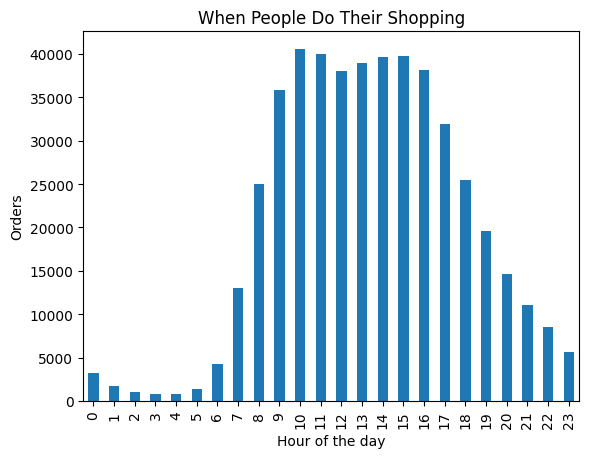

In [ ]:
popular_hours_indexed = popular_hours.sort_index()
popular_hours_indexed.plot(x='Hour of day', kind='bar', ylabel='Orders', xlabel='Hour of the day', title='When People Do Their Shopping')

### [A3] What day of the week do people shop for groceries?

In [ ]:
#I will use the value_counts method just as I did above
#dows = {0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'}
popular_days = df_orders['order_dow'].value_counts()
print(popular_days)
#we can see that Sunday is the most popular shopping day and Thursday is the least popular

0    84090
1    82185
2    65833
5    63488
6    62649
3    60897
4    59810
Name: order_dow, dtype: int64


<AxesSubplot:title={'center':'Comparison of Days People Order Groceries'}, xlabel='Day of Week', ylabel='Amount of Orders'>

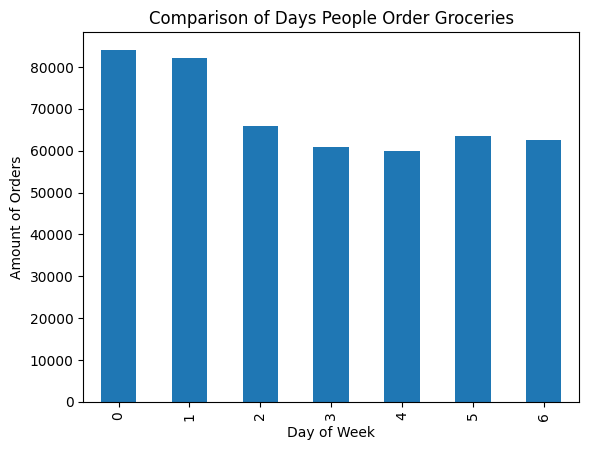

In [ ]:
popular_days_indexed = popular_days.sort_index()
popular_days_indexed.plot(x='day of week', kind='bar', title='Comparison of Days People Order Groceries', xlabel='Day of Week', ylabel='Amount of Orders')

### [A4] How long do people wait until placing another order?

In [ ]:
# using the days since prior order column to and the mean method to give me a measure for how long people wait.
waiting_time_avg = df_orders['days_since_prior_order'].mean()
print(f'People wait an average of {waiting_time_avg:.1f} days before placing another order.')

People wait an average of 11.1 days before placing another order.


In [ ]:
#I will show the min, max, and median as well to show other data for how long people wait.
waiting_time_min = df_orders['days_since_prior_order'].min()
waiting_time_max = df_orders['days_since_prior_order'].max()
waiting_time_median = df_orders['days_since_prior_order'].median()
print('minumum between orders is:', waiting_time_min, 'days')
print('maximum between orders is:',waiting_time_max, 'days')
print('median between orders is:', waiting_time_median, 'days')

minumum between orders is: 0.0 days
maximum between orders is: 30.0 days
median between orders is: 7.0 days


# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

In [ ]:
#I'm just bringing the dataframe into view so I don't have to keep scrolling to the top to reference it.
print(df_orders.head())

   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   196724             2          4                 12   

   days_since_prior_order  
0                    30.0  
1                     9.0  
2                     2.0  
3                    10.0  
4                    17.0  


In [ ]:
#use a conditional statement to define wednesday. I've decided that day 0 is Sunday, which makes 3 = Wednesday
df_wednesday = df_orders[df_orders['order_dow'] == 3]
print(df_wednesday.head())
print()
df_wednesday.info()

    order_id  user_id  order_number  order_dow  order_hour_of_day  \
6    2511640   148233            40          3                  8   
16   3109465    55090            19          3                 15   
28    133707   182261             1          3                 10   
30   1890318   193501             3          3                 15   
35    125325   106853             6          3                 19   

    days_since_prior_order  
6                      2.0  
16                     9.0  
28                     NaN  
30                    30.0  
35                    30.0  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60897 entries, 6 to 478965
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                60897 non-null  int64  
 1   user_id                 60897 non-null  int64  
 2   order_number            60897 non-null  int64  
 3   order_dow               60897 n

In [ ]:
#I've made the assumption that Saturday is day six. So, I'm going to use a conditional argument to sort according to day 6.
df_saturday = df_orders[df_orders['order_dow'] == 6]
print(df_saturday.head())

    order_id  user_id  order_number  order_dow  order_hour_of_day  \
0    1515936   183418            11          6                 13   
11    102585   191558            18          6                 16   
14   2843219    74699             4          6                 11   
20     50934   178510             9          6                  9   
26   1844247   122558             4          6                 18   

    days_since_prior_order  
0                     30.0  
11                     8.0  
14                    30.0  
20                     5.0  
26                    30.0  


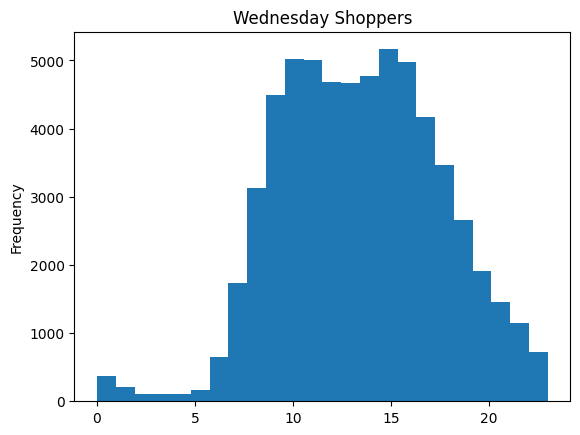

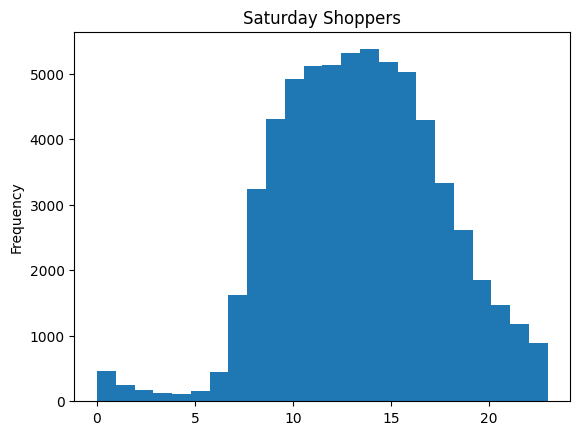

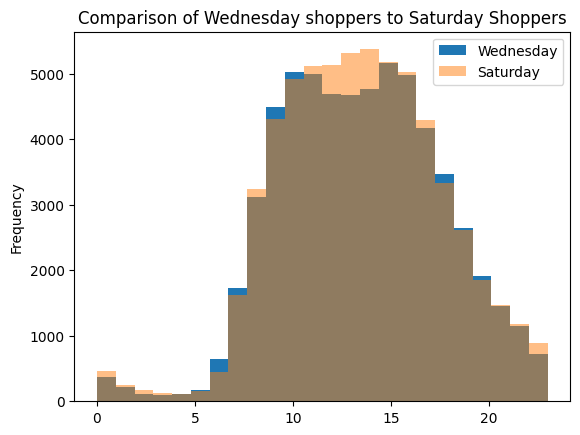

In [ ]:
#Histogram plots of Wednesday vs. Saturday shoppers. The first two are separate, and then I overlay the two histograms to see the differences
df_wednesday['order_hour_of_day'].plot(kind='hist', bins=24, title='Wednesday Shoppers')
plt.show()
df_saturday['order_hour_of_day'].plot(kind='hist', bins=24, title='Saturday Shoppers')
plt.show()
df_wednesday['order_hour_of_day'].plot(kind='hist', bins=24, title='Comparison of Wednesday shoppers to Saturday Shoppers')
df_saturday['order_hour_of_day'].plot(kind='hist', bins=24, alpha=.50)
plt.legend(['Wednesday', 'Saturday'])
plt.show()

### [B2] What's the distribution for the number of orders per customer?

In [ ]:
#I'm showing the total range of orders from each customer. The order_number column shows which order this was for each customer
order_min = df_orders['order_number'].min()
order_max = df_orders['order_number'].max()
print('The range of orders per customer is from ', order_min, 'to ', order_max)
print('the median number of repeat customers is', df_orders['order_number'].median(), 'and an average of', df_orders['order_number'].mean())

The range of orders per customer is from  1 to  100
the median number of repeat customers is 11.0 and an average of 17.157562762030434


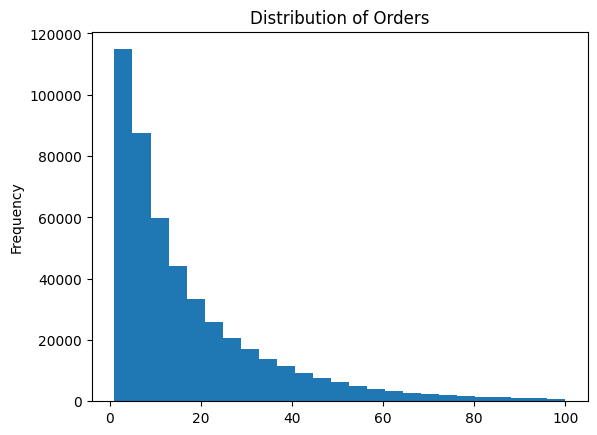

In [ ]:
#I make a histogram plot to show the above range and the distribution of those orders
df_orders['order_number'].plot(kind='hist', bins=25, title='Distribution of Orders')
plt.show()
#This histogram shows that most people have only done 1-4 orders. 

### [B3] What are the top 20 popular products (display their id and name)?

In [ ]:
#In this task, I'm expecting to need to use the 'order_products' and 'products' dataframes
#I'm working off of the theory that the value for 'product_id' is the same for each frame
print(df_order_products.head())
print()
print(df_products.head())

   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440                 17          0
1    567889        1560                  1          1
2   2261212       26683                  1          1
3    491251        8670                 35          1
4   2571142        1940                  5          1

   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  


In [ ]:
#make a list of the 20 most popular product id's
#I'll use the value_counts method again to find the top 20 id's used.
product_count = df_order_products['product_id'].value_counts().head(20)
#now I'll find the corresponding product names to the above id's
product_names = df_products.loc[df_products['product_id'].isin(product_count.index),['product_id', 'product_name']]
#Now I'm going to greate a new dataframe with the product id, product name, and the amount ordered
popular_items = product_names.set_index('product_id').join(product_count.rename('count'))
popular_items = popular_items.sort_values(by='count', ascending=False)
print(popular_items)

                        product_name  count
product_id                                 
24852                         Banana  66050
13176         Bag of Organic Bananas  53297
21137           Organic Strawberries  37039
21903           Organic Baby Spinach  33971
47209           Organic Hass Avocado  29773
47766                Organic Avocado  24689
47626                    Large Lemon  21495
16797                   Strawberries  20018
26209                          Limes  19690
27845             Organic Whole Milk  19600
27966            Organic Raspberries  19197
22935           Organic Yellow Onion  15898
24964                 Organic Garlic  15292
45007               Organic Zucchini  14584
39275            Organic Blueberries  13879
49683                 Cucumber Kirby  13675
28204             Organic Fuji Apple  12544
5876                   Organic Lemon  12232
8277        Apple Honeycrisp Organic  11993
40706         Organic Grape Tomatoes  11781


<AxesSubplot:title={'center':'Top 20 Items Purchased with Instacart'}, xlabel='Product', ylabel='Amount Purchased'>

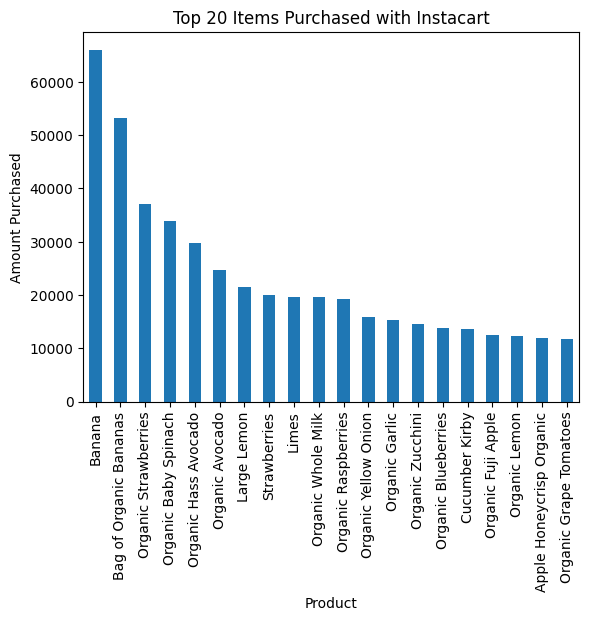

In [ ]:
#This bar graph will show the top 20 items purchased.
popular_items.plot(x='product_name', kind='bar',legend=False, title='Top 20 Items Purchased with Instacart', xlabel='Product', ylabel='Amount Purchased')


# [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?

In [4]:
#I'm thinking that I can do this completely from the 'order_products' dataframe using both the 'order_id' and 'product_id' columns
#for reference, here is the beginning of that dataframe
print(df_order_products.head())

NameError: name 'df_order_products' is not defined

In [ ]:
#I will use value_counts to see how many times each order_id shows up in the dataframe. This will be the amount of items per order.
items_per_order = df_order_products['order_id'].value_counts() #This ends up showing a range of 1 to 127 items in the orders

print('Average Number of items per order:')
print(f'{items_per_order.mean():.1f}')
print()
print('Median Number of items per order:')
print(items_per_order.median())
print()
print('Range of items per order:')
print(items_per_order.min(), 'to', items_per_order.max())
#given the difference between the average and the median and the range, it is clear that there will be significant outliers.
#I will plot this in a histogram and it should show a significant skew.

Average Number of items per order:
10.1

Median Number of items per order:
8.0

Range of items per order:
1 to 127


<AxesSubplot:title={'center':'Amount of items in a single order'}, ylabel='Frequency'>

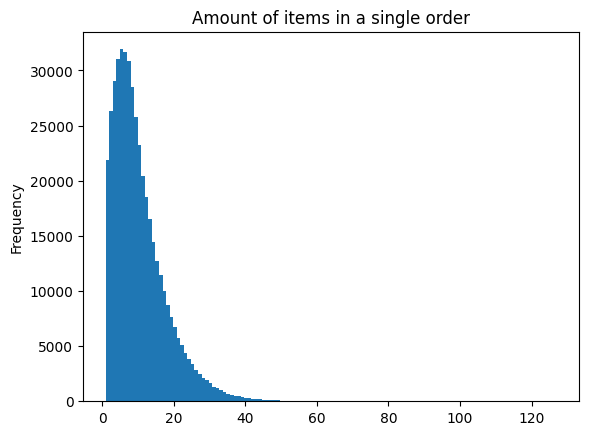

In [ ]:
#Using a Histogram to show the substantial skew of the items per order data.
items_per_order.plot(kind='hist',bins=127, xlabel='Number of Items', ylabel='Count of Orders', title='Amount of items in a single order')


### [C5] What are the top 20 items that people put in their carts first? 

In [ ]:
#Both the 'order_products' and the 'products' dataframes are going to be involved in this process.
print(df_order_products.head())
print('------------')
print(df_products.head())

   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440                 17          0
1    567889        1560                  1          1
2   2261212       26683                  1          1
3    491251        8670                 35          1
4   2571142        1940                  5          1
------------
   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  


In [ ]:
#This is very similar to the code from the last task of section B.
#My first line of code isolates only the items that have a value of 1 in 'add_to_car_order'
#from there I simply follow the same structure I did above to make the dataframe show the top items put in the cart first.
first = df_order_products[df_order_products['add_to_cart_order'] == 1]
first_count = first.value_counts('product_id').head(20)
top_name = df_products.loc[df_products['product_id'].isin(first_count.index),['product_id', 'product_name']]
top_item = top_name.set_index('product_id').join(first_count.rename('count'))
top_item = top_item.sort_values(by='count', ascending=False)
print(top_item)

                           product_name  count
product_id                                    
24852                            Banana  15562
13176            Bag of Organic Bananas  11026
27845                Organic Whole Milk   4363
21137              Organic Strawberries   3946
47209              Organic Hass Avocado   3390
21903              Organic Baby Spinach   3336
47766                   Organic Avocado   3044
19660                      Spring Water   2336
16797                      Strawberries   2308
27966               Organic Raspberries   2024
44632        Sparkling Water Grapefruit   1914
49235               Organic Half & Half   1797
47626                       Large Lemon   1737
196                                Soda   1733
38689          Organic Reduced Fat Milk   1397
26209                             Limes   1370
12341                     Hass Avocados   1340
5785        Organic Reduced Fat 2% Milk   1310
27086                       Half & Half   1309
43352        

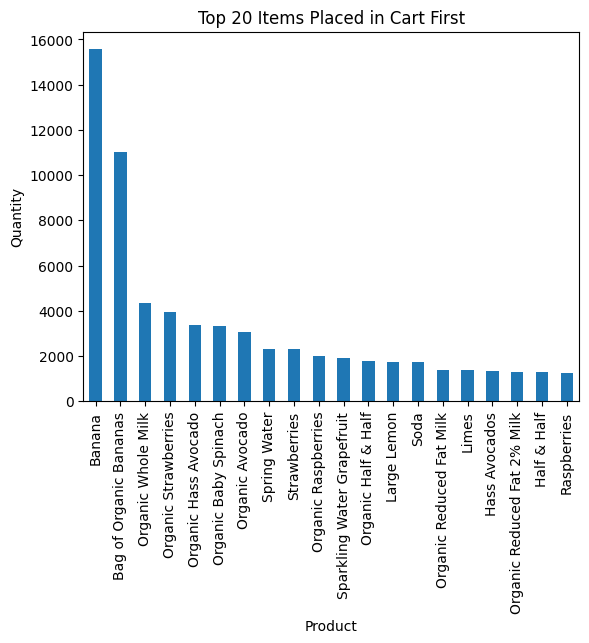

In [ ]:
#This bar graph will show the top 20 items put in the cart first
top_item.plot(x='product_name', kind='bar', title='Top 20 Items Placed in Cart First', xlabel='Product', ylabel='Quantity', legend=False)
plt.show()

## Conclusion ##

In this project I was able to explore and analyze 5 different datasets from Instacart. By cleaning up the data and then analyzing it, I was able to discover important information about online grocery shopping tendencies, such as the most popular days to shop using Instacart, the peak hours of use, the most popular items shopped for, and what people put in their carts first.

Order Patterns: I found that the most popluar days to shop are Sunday and Monday. I also found that the peak hours for online grocery shopping are midday hours from 10am to 3pm.

Popular items: I found that of the top 20 items purchased through Instacart, 19 were produce and 1 was milk. The most popular item overall is Bananas. These items will likely be important for stores to keep in stock and ready for selection. 

Reordering Trends: I found that there are many customers who are repeat customers with an average of over 17 times returning to use Instacart.

The findings from this study will provide valuable insights to Instacart in how to continue building a successful business. Additional studies in the future can seek to understand the reasons behind the trends illuminated in this report.